In [4]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import itertools
from math import pi
import time
import matplotlib.pyplot as plt
import h5py
import orbithunter.persistent_homology as ohgudhi
import gudhi

In [5]:
def critical_values(scores):
    cval = [0.0001, 0.001, 0.01, 0.05]
    return np.array([np.quantile(scores, q) for q in cval])

def produce_scores(family, **kwargs):
    family_scores = None
    group_orbit_sampling = kwargs.get('group_orbit', True)
    sampling_rate = kwargs.get('sampling_rate', 1)
    print('[', end='')
    for j, window in enumerate(family):
        print('#',end='')
        window = window.from_fundamental_domain().transform(to='field')
        member_scores = []
        for base_num in range(kwargs.get('n_trajectories', 1000)//sampling_rate):
            base = read_h5('../notebooks/large_trajectory.h5', '/'+str(int(base_num*sampling_rate))).resize(832, 832)
            if group_orbit_sampling:
                for gwindow in window.group_orbit(**kwargs):
                    member_scores.extend(scan(base, gwindow, **kwargs)[0].ravel())
            else:
                member_scores.extend(scan(base, window, **kwargs)[0].ravel())

        if family_scores is None:
            family_scores = np.zeros([len(family), len(np.array(member_scores).ravel())])
        family_scores[j, :] = np.array(member_scores).ravel()
    print(']',end='')
    return family_scores.ravel()


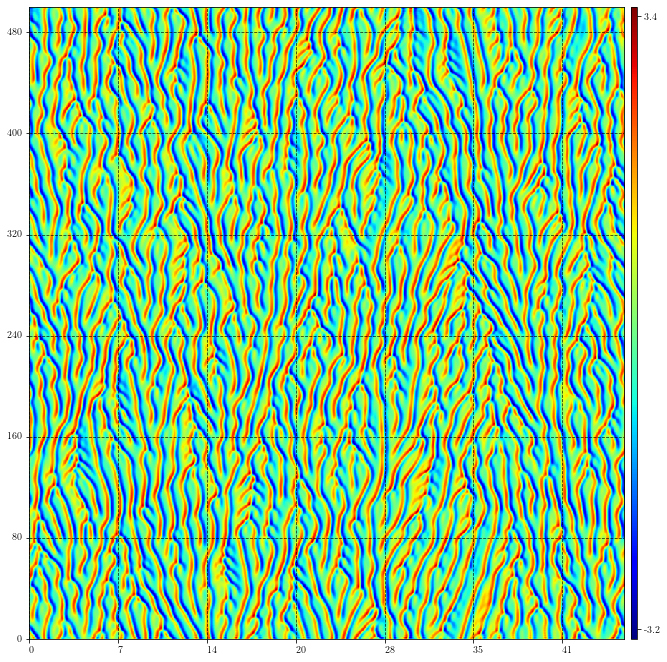

In [6]:
covering = [sorted([x.transform(to='field') for x in family], key=lambda o:o.x) for family in read_h5('covering.h5')]
base = read_h5('large_trajectory.h5', '/1').resize(832, 832).transform(to='field')
base.plot()

# Shadowing

Before we can talk about the statistics and proportion of space-time that each orbit family covers,
we must first determine the baselines/threshold values for the shadowing metric. The most important
reason is simply to get a threshold value which is non-arbitary, based upon the distribution of this metric when
ranging over families, group orbits, and arbitrary trajectory segments in space-time. The second reason is to
delve into the details of the families themselves. As we shall see, not every orbit reached by numerical continuation is necessarily in the same continuous family. If accidentally mixed, then the thresholds as determined by the
distributions of the shadowing metric likely do not make sense. Persistent homology is used towards this end. It provides a guide for how to determine both the sampling and bounds of the members of each family to be used
as our covering set.

## Defect family investigation

Before jumping into the full problem, i.e. before using multiple continuous families, let us first investigate
a single family. To do so, we can import the previously derived family (produced via continuation).

In [7]:
# covering = read_h5('../../notebooks/covering_old.h5')
# covering = read_h5('continuation_covering.h5')
# covering = [np.array([x.transform(to='field') for x in fam]) for fam in covering]
defect_family = covering[0]
family_size = [len(x) for x in covering]

In [13]:
defect_family = sorted(covering[0], key=lambda x : x.t)
drifter_family = sorted(covering[1], key=lambda x : x.t)
large_defect_family = sorted(covering[2], key=lambda x : x.t)
# streak_family = sorted(covering[3], key=lambda x : x.x)#[7:22]
wiggle_family = sorted(covering[3], key=lambda x : x.t)

#########################


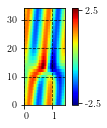

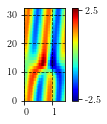

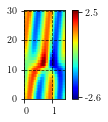

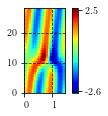

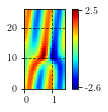

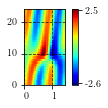

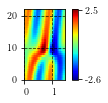

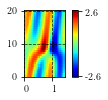

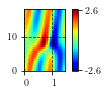

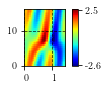

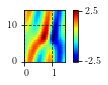

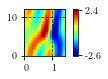

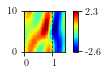

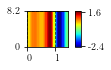

#########################


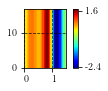

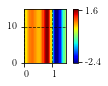

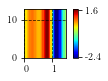

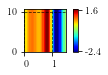

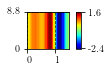

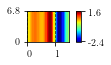

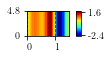

#########################


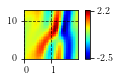

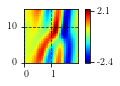

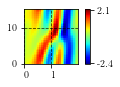

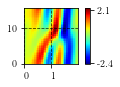

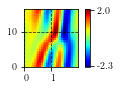

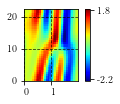

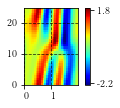

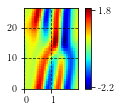

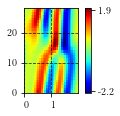

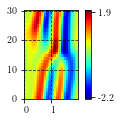

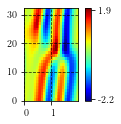

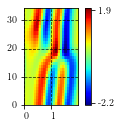

#########################


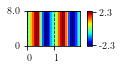

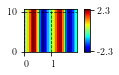

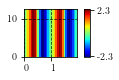

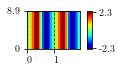

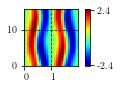

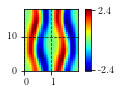

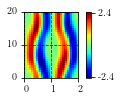

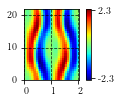

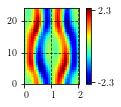

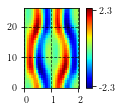

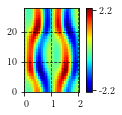

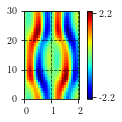

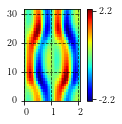

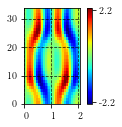

In [14]:
for x in covering:
    print('#########################')
    for y in x[::20]:
        y.plot()

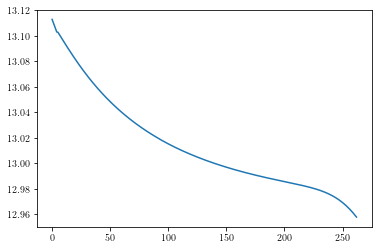

In [15]:
plt.plot([x.x for x in defect_family])

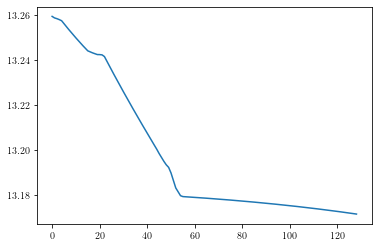

In [16]:
plt.plot([x.x for x in drifter_family])

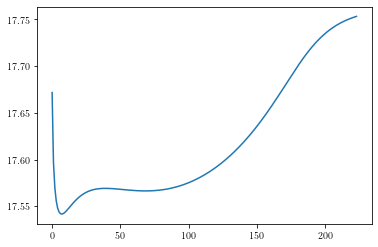

In [17]:
plt.plot([x.x for x in large_defect_family])

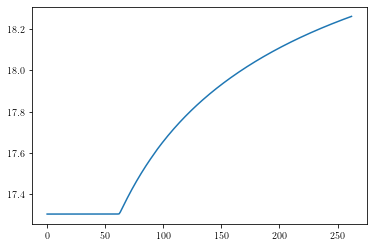

In [18]:
plt.plot([x.x for x in wiggle_family])

In [20]:
covering_families = [defect_family, drifter_family, large_defect_family, wiggle_family]
entire_covering = [o for fam in covering_families for o in fam]
# entire_covering_reordered = [sorted(defect_family+drifter_family+large_defect_family,key=lambda x : x.x), wiggle_family]
# entire_covering_reordered = [o.transform(to='field') for fam in entire_covering_reordered for o in fam]

First, a quick glimpse through example orbits reached by continuation. 

### Methodology

To collect our distribution of the amplitude difference metric, there are three choices to be made.

    1. The base orbits to scan over
    2. How often to sample them (i.e. how many window positions to compute the amplitude difference).
    3. How many group orbit members to use for each window orbit.
    
For the preliminary investigations, thirty different trajectory segments produced by integration are used, each of which has large spatiotemporal area. To reduce their relations to one another, the trajectory segments are part of a very long trajectory which has been chopped into pieces. Every other piece is collected to be used as a base orbit. Clearly if regions of space-time can be strongly correlated when separated by 500 dimensionless time units, this breaks down.

Instead of exhaustively computing the statistic; for every position for each group orbit member in each family, the
sampling is done by taking a subset of the group orbit members and a subset of the positions; for each member of the
continuous family defined in ```defect_family```
    
Additionally, the windows are rediscretized to abide by the same grid spacing as the base orbit as clearly
shadowings are assumed to be the same size as the orbits they shadow. 

In [21]:
base_orbits_30 = read_h5('large_trajectory.h5', tuple(['/'+str(i) for i in range(30)]))

To compute the amplitude differences, iterate over the windows (family members), each window's group orbit (taken to be discrete subgroup for this run, and the 30 base orbits (trajectories). 

#### Group orbit distribution of amplitude difference $|u^2 - v^2|$ metric

In [ ]:
kwargs = {          
          'strides': (32, 32),
#           'rolls': (4, 4),
          'fundamental_domain': False,
#           'scoring_function':  scoring_function,
#           'score_type': 'persistence',
#           'persistence_function': persistence_function,
          'group_orbit': False,
          'n_trajectories':1000,
          'sampling_rate':30
           }

defect_family_scores = produce_scores(defect_family, **kwargs)

[###############################################################################################################################################################

In [ ]:
kwargs = {          
          'strides': (32, 32),
#           'rolls': (4, 4),
          'fundamental_domain': False,
#           'scoring_function':  scoring_function,
#           'score_type': 'persistence',
#           'persistence_function': persistence_function,
          'group_orbit': False,
          'n_trajectories':1000,
          'sampling_rate':30
           }
defect_group_orbit_scores = produce_scores(list(defect.group_orbit(roll=(4,4))), **kwargs)

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
ax1.hist(defect_group_orbit_scores.ravel(), bins=100)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amplitude difference')
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
for g in defect_group_orbit_scores:
    plt.hist(g.ravel(), alpha=0.1, color='black', bins=50)
plt.ylabel('Frequency')
plt.xlabel('Amplitude difference')
plt.show()

Visualize the distribution of all values. 

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
ax1.hist(defect_family_scores.ravel(), bins=100)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Amplitude difference')
plt.show()

The distribution for each family member (all group orbit members included) can be overlaid on top of one another to approximate whether the variables can be treated as IID or not. 



In [ ]:
plt.figure(figsize=(12,12))
for g in defect_family_scores:
    plt.hist(g.ravel(), alpha=0.1, color='black', bins=50)
plt.ylabel('Frequency')
plt.xlabel('Amplitude difference')
plt.show()

Because we want thresholds for each family, it does not make sense to me to use a single threshold value if each
member has a different distribution. To determine the bounds of each family, I appeal to persistent homology;
specifically, the "bottleneck distance" between the family members. This is made accessible through the ```gudhi``` package, which I have built in some wrappers for.

In [ ]:
import orbithunter.persistent_homology as ohgudhi

Take the pairwise bottleneck distance between each family member and plot as as a symmetric matrix

#### Family partitionion based on persistent homology.

To really hammer the point home: even though we basically know how to split orbits up into families, based on the original continuation, compute ALL pointwise bottleneck distances.

In [ ]:
all_persistences = []
for each_orbit in entire_covering:
    all_persistences.append(ohgudhi.orbit_complex(each_orbit,
                                                 ).persistence(min_persistence=0.01))
entirety_homology_scores = np.zeros([len(all_persistences),len(all_persistences)])
for i in range(len(all_persistences)):
    for j in range(i, len(all_persistences)):
        entirety_homology_scores[i, j] = ohgudhi.gudhi_distance_from_persistence(all_persistences[i], 
                                                                                 all_persistences[j],
                                                                                 metric='bottleneck')

In [ ]:
entirety_homology_scores = entirety_homology_scores.reshape(len(all_persistences),len(all_persistences))

In [ ]:
# homology_scores[homology_scores==0.] = np.nan

In [ ]:
homology_scores = entirety_homology_scores.copy()
plt.figure(figsize=(10,10))
plt.imshow(homology_scores, interpolation='none')
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow((entirety_homology_scores+entirety_homology_scores.T), interpolation='none')
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(((entirety_homology_scores+entirety_homology_scores.T) < 0.9).astype(int), interpolation='none')
plt.colorbar()
plt.show()

Why is there coupling (the checkerboard pattern) instead of a block diagonal structure? (this is an arbitrary threshold mind you). It turns out that the first three "families"
are likely connected. The checkerboard pattern simply emerges from their arrangement. To provide evidence for this we can look at the 'families' members directly. For example. The first 5 or so members of the first family seem coupled to the second family.

In [ ]:
for x,y  in zip(defect_family[-5:], drifter_family[:5]):
    print(x.dimensions())
    x.plot(), y.plot()

Likewise, there seeems to be strong similarity between the first and third families; they are essentially the same orbit but on different domain sizes. The connection between these two branches is elusive; hence the segmentation.

In [ ]:
for x,y  in zip(np.array(defect_family)[[-20, -30, -40]], np.array(large_defect_family)[[10, 20, 30]]):
    print(x.dimensions())
    x.plot(), y.plot()

Combining these three branch segments and then ordering by temporal periods yields the following bottleneck distance matrix

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(homology_scores, interpolation='none')
plt.colorbar()
plt.show()

In [ ]:
truth_values = homology_scores.copy()

for slc in [slice(0,260), slice(260, 392), slice(392, 619), slice(619, 685), slice(685, None)]:
    truth_values[slc, slc] = 5
truth_values=truth_values.T
truth_values[np.triu_indices(truth_values.shape[0], k=0)]=0
truth_values=truth_values.T

plt.figure(figsize=(10,10))
plt.imshow(truth_values, interpolation='none')
plt.colorbar()
plt.show()

In [ ]:
for slc in [slice(0,260), slice(260, 392), slice(392, 619), slice(619, 685), slice(685, None)]:
    plt.figure()
    plt.imshow(truth_values.astype(int)[slc, slc], interpolation='none')
    plt.colorbar()
    plt.show()
    print('################################################')
    for orbit in entire_covering_reordered[slc]:
        orbit.to_fundamental_domain().plot(padding=False)

In [ ]:
covering_processed = []
for slc in [slice(0,260), slice(260, 392), slice(392, 620), slice(620, 685), slice(685, None)]:
    covering_processed.append(entire_covering_reordered[slc])
    
# for slicing purposes
large_cover = [np.array(x) for x in covering_processed]

In [ ]:
small_cover = [np.array(large_cover[0])[100::50],
                                           np.array(large_cover[1])[::50],
                                           np.array(large_cover[2])[:-50:50],
                                           np.array(large_cover[4])[::50]]

In [ ]:
medium_cover =[np.array(large_cover[0])[100::25],
                                           np.array(large_cover[1])[::25],
                                           np.array(large_cover[2])[:-50:25],
                                           np.array(large_cover[4])[::25]]

In [ ]:
for o in sorted(large_cover[2], key=lambda x: x.t):
    o.plot()

In [ ]:
cover = [np.array(large_cover[0])[[-100]],
         np.array(large_cover[1])[[-100]],
         np.array(large_cover[2])[[0]],
         np.array(large_cover[4])[[50]]]

In [ ]:
for x in cover:
    print('###')
    for y in x:
        y.plot()

In [ ]:
final_cover = cover.copy()
for fam in final_cover[:-1]:
    for i in range(len(fam)):
        fam[i] = fam[i].to_fundamental_domain()

In [ ]:
final_cover

In [544]:
for o in np.concatenate(final_cover):
#     print(o)
    o.to_h5('cover.h5')

Unable to compute residual for RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [18.211, 13.014, -3.295]})
Unable to compute residual for RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [13.92, 13.175, -6.499]})
Unable to compute residual for RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [13.081, 17.542, -5.882]})


In [545]:
keys = tuple(['defect', 'drifter', 'larger_defect', 'wiggle'])

In [108]:
# for name, families in zip(keys, covering_processed):
#     for orbit in families:
#         orbit.to_h5('large_cover.h5', groupname=name)

# for name, families in zip(reduced_keys, medium_covering_processed):
#     for orbit in families:
#         orbit.to_h5('medium_cover.h5', groupname=name)

# for name, families in zip(reduced_keys, small_covering_processed):
#     for orbit in families:
#         orbit.to_h5('small_cover.h5', groupname=name)

# for name, families in zip(reduced_keys, final_cover):
#     for orbit in families:
#         orbit.to_h5('cover.h5', groupname=name)

Because we have reduced the number of family members by an order of a hundred, we need to increase the sampling rate
to get more accurate statistics. Fundamental domains yes or no?

In [547]:
score_type='persistence'
scoring_function = ohgudhi.gudhi_distance_from_persistence
persistence_function = ohgudhi.orbit_persistence

In [ ]:
# #### Family scoring.

kwargs = {
          'strides': (128,128),
#           'rolls': (4, 4),
          'fundamental_domain': False,
#           'scoring_function': 
#           'score_type':
#           'persistence_function':
          'group_orbit': False,
          'n_trajectories':1000,
          'sampling_rate':30
           }

defect_family_no_group_orbit_scores = produce_scores([final_cover[0][1]], **kwargs)

kwargs = {
          'strides': (128,128),
#           'rolls': (4, 4),
          'fundamental_domain': True,
#           'scoring_function': 
#           'score_type':
#           'persistence_function':
          'group_orbit': False,
          'n_trajectories':1000,
          'sampling_rate':30
           }

defect_family_no_group_orbit_scores_fd = produce_scores([final_cover[0][1]], **kwargs)

kwargs = {
          'strides': (128,128),
          'rolls': (4, 4),
          'fundamental_domain': False,
          'scoring_function':  scoring_function,
          'score_type': 'persistence',
          'persistence_function': persistence_function,
          'group_orbit': False,
          'n_trajectories':1000,
          'sampling_rate':30
           }
defect_family_no_group_orbit_persistence_scores = produce_scores([final_cover[0][1]], **kwargs)

kwargs = {          
          'strides': (128,128),
          'rolls': (4, 4),
          'fundamental_domain': True,
          'scoring_function':  scoring_function,
          'score_type': 'persistence',
          'persistence_function': persistence_function,
          'group_orbit': False,
          'n_trajectories':1000,
          'sampling_rate':30
           }

defect_family_no_group_orbit_persistence_scores_fd = produce_scores([final_cover[0][1]], **kwargs)

# #### Group orbit scoring.

In [534]:
kwargs1 = {
          'strides': (256, 256),
          'rolls': (8, 8),
          'fundamental_domain': False,
          'group_orbit': True,
          'n_trajectories':1000,
          'sampling_rate':1
           }
# defect_group_orbit_scores = produce_scores([final_cover[0][1]], **kwargs)

kwargs2 = {
          'strides': (256, 256),
          'rolls': (8, 8),
          'fundamental_domain': True,
          'group_orbit': True,
          'n_trajectories':1000,
          'sampling_rate':1
           }

# defect_family_no_group_orbit_scores_fd =produce_scores([final_cover[0][1]], **kwargs)

kwargs3 = {
          'strides': (256, 256),
          'rolls': (8, 8),
          'fundamental_domain': False,
          'scoring_function':  scoring_function,
          'score_type': 'persistence',
          'persistence_function': persistence_function,
          'group_orbit': True,
          'n_trajectories':1000,
          'sampling_rate':1,
          'min_persistence':0.1
           }
# defect_family_no_group_orbit_persistence_scores = produce_scores([final_cover[0][1]], **kwargs)



kwargs4 = {
          'strides': (256, 256),
          'rolls': (8, 8),
          'fundamental_domain': True,
          'scoring_function':  scoring_function,
          'score_type': 'persistence',
          'persistence_function': persistence_function,
          'group_orbit': True,
          'n_trajectories':1000,
          'sampling_rate':1,
          'min_persistence':0.1
           }
# defect_family_no_group_orbit_persistence_scores_fd = produce_scores([final_cover[0][1]], **kwargs)

In [550]:
scores = []
for i, families in enumerate(final_cover):
    family_scores = []
    print('')
    print('family ', i)
    for kwargs in [kwargs1, kwargs2, kwargs3, kwargs4]:
        family_scores.extend(produce_scores(families, **kwargs))
    scores.append(family_scores)


family  0
[#][#][#][#]
family  1
[#][#][#][#]
family  2
[#][#][#][#]
family  3
[#][#][#][#]

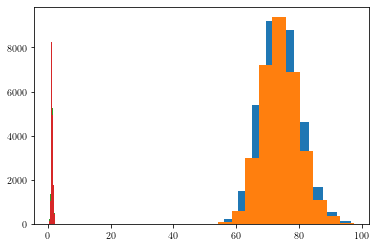

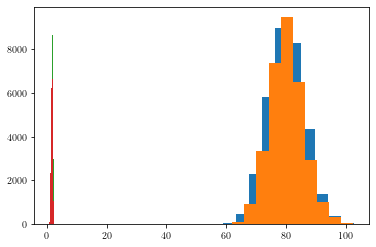

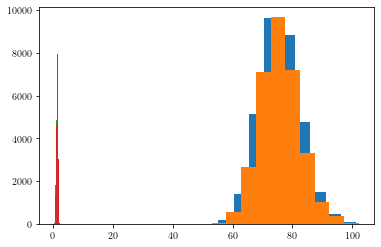

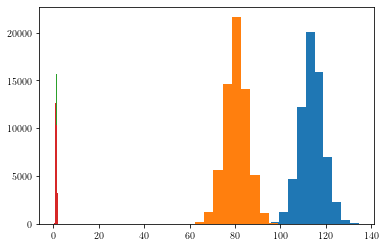

In [582]:
critical_vals = []
for x in scores:
    plt.figure()
    cv = []
    for y in x:
        cv.append(critical_values(y))
        plt.hist(y)
    critical_vals.append(cv)
    plt.show()
#     print(np.array(x).shape)

In [586]:
keys

('defect', 'drifter', 'larger_defect', 'wiggle')

In [589]:
with h5py.File('critical_values.h5','w') as file:
    for key, c in zip(keys, critical_vals):
        file.create_dataset(key, data=np.array(c))

In [563]:
[np.array(scr) for scr in scores][0].shape

(4, 32000)

#### Get the scores for both metrics for both fundamental and physical domains.

Append these scores to the corresponding groups (families) in the h5 file.

In [237]:
hmlscr = np.array([x for famscores in scores for x in famscores[-2:]]).transpose()

ValueError: could not broadcast input array from shape (3,1056) into shape (3)

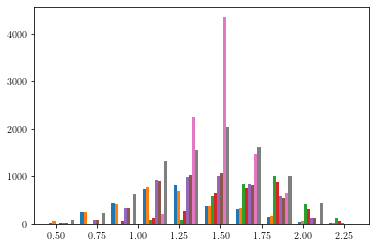

In [241]:
plt.hist(np.array([x.ravel() for famscores in scores for x in famscores[-2:]]).transpose())
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
for famscores in scores:
#     for x in famscores[:-2]:
#         plt.hist(x.ravel(),alpha=0.5)
#     plt.show()
#     plt.figure()
    for x in famscores[-2:]:
        plt.hist(x.ravel(), alpha=0.7, bins=100)
plt.show()

In [590]:
large_cover

[array([RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [34.211, 12.958, -3.24]}),
        RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [34.111, 12.959, -3.24]}),
        RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [34.011, 12.96, -3.24]}),
        RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [33.911, 12.961, -3.241]}),
        RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [33.811, 12.962, -3.241]}),
        RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [33.711, 12.963, -3.241]}),
        RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [33.611, 12.964, -3.241]}),
        RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [33.511, 12.965, -3.242]}),
        RelativeOrbitKS({"shape": [32, 32], "basis": "field", "parameters": [33.411, 12.966, -3.242]}),
        RelativeOrbitKS({"shape": [32, 32], "basis": "field", "param

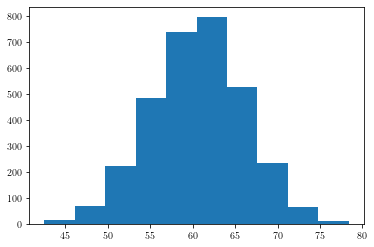

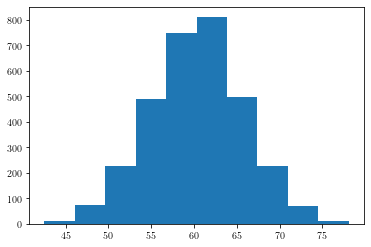

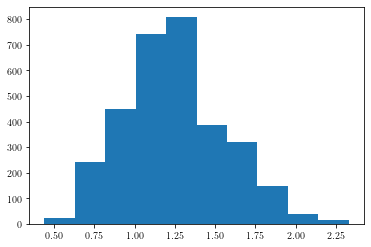

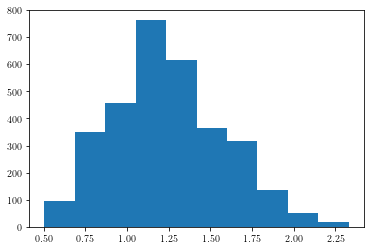

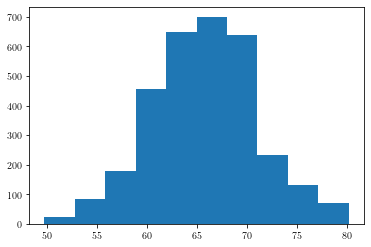

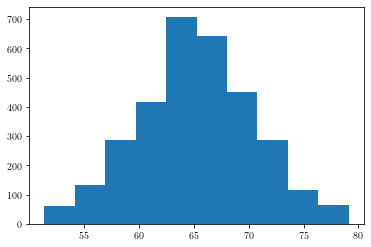

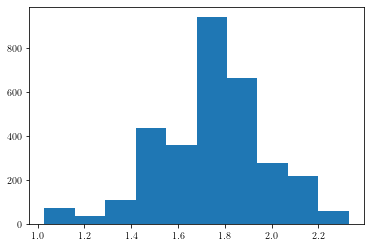

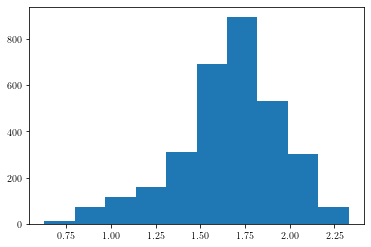

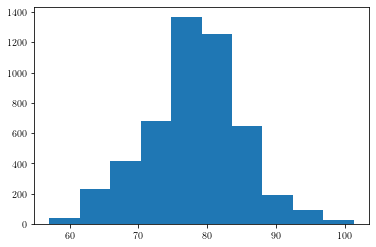

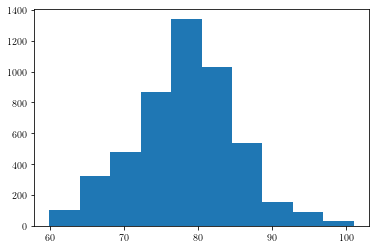

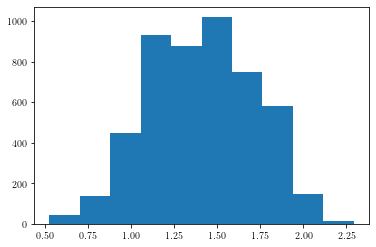

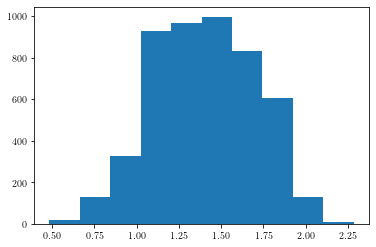

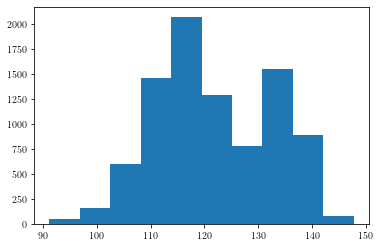

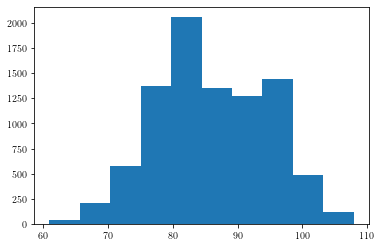

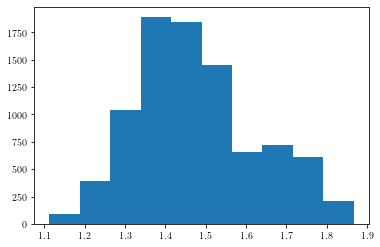

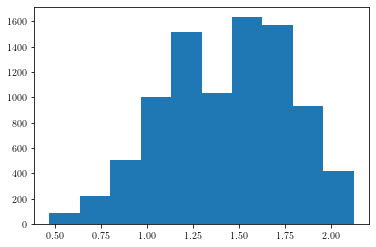

In [225]:
for famscores in scores:
    for x in famscores:
        plt.figure()
        plt.hist(x.ravel())
        plt.show()

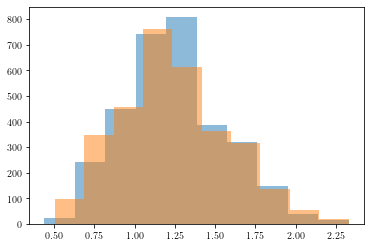

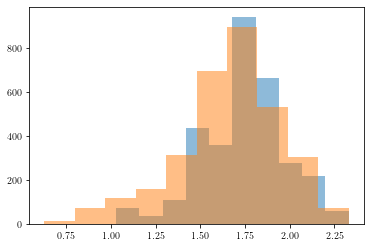

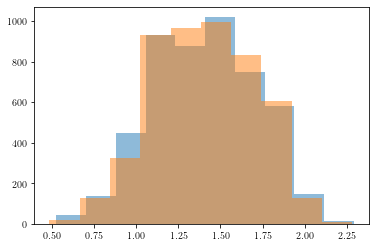

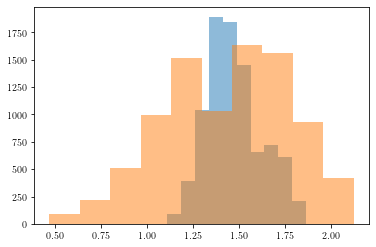

In [245]:
for famscores in scores:
#     plt.figure()
#     for x in famscores[:-2]:
#         plt.hist(x.ravel(),alpha=0.5)
#     plt.show()
    plt.figure()
    for x in famscores[-2:]:
        plt.hist(x.ravel(), alpha=0.5)
    plt.show()

In [166]:
def save_scores_to_groups(filename, groups, clabels, cvals):
    with h5py.File(filename, 'r') as file:
        for i, g in enumerate(groups):
            for  lab, val in zip(clabels[i], cvals[i]):
                file[g].attrs[lab] = val

In [167]:
clabels = ['critical_values', 'fundamental_domain_critical_values', 'critical_persistence_values', 'fundamental_domain_critical_persistence_values']

For thresholds, compute the critical values associated with the 0.01%, 0.1%, 1%, 5% percent thresholds.